<a href="https://colab.research.google.com/github/ivillalonga/NnDgree3/blob/main/Proyecto%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions

1. What is our **independent variable**? What is our **dependent variable**?
2. What is an **appropriate set of hypotheses** for this task? What kind of **statistical test** do you expect to perform? Justify your choices.
3. **Report some descriptive statistics** regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. **Provide one or two visualizations** that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, **perform the statistical test and report your results**. What is your **confidence level and your critical statistic value**? Do you reject the null hypothesis or fail to reject it? **Come to a conclusion** in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!


**1.** An independent variable is a variable that changes or is controlled in an experiment to test the effects on the dependent variable.

In our experiment, the independant refers to the color of the ink, while the dependant variable is the time taken to name the color. 

**2**. The hypothesis in the current test is: Incogruent words require more time to be identified, because the words do not match the color in which are printed. This incongruency implies more effort, and therefore, more time.

This means that the null hypothesis is: Average time spent on words with an incogruent color is not longer than the average time spent on words that match with the color that are print (congruent words)

And the alternative Hypothesis is: Average time spent on incongruent words is longer than the average time spent on congruent words

$ H_0: $ There is no difference in response time under incongruent and congruent conditions ( $ H_0: μC = μI $).


$ H_1: $ Time with incongruent condition will be **significantly** larger than the response time with congruent condition ( $ H_1: μC < μI $ ).

**3.** Descriptive statistics

In [1]:
#Import Required modules
import pandas as pd
import numpy as np
from scipy import stats as pt
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Read data
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
#Mean
con_mean = df['Congruent'].mean()
inc_mean = df['Incongruent'].mean()

#median
con_median = df['Congruent'].median()
inc_median = df['Incongruent'].median()

#deviation
con_std = df['Congruent'].std()
inc_std = df['Incongruent'].std()


In [9]:
print ("Variable             ", "Congruent         ", "Incongruent")
print ("Means                ", con_mean, inc_mean)
print ("Medians              ", con_median,"          ", inc_median)
print ("Standard Desviations ", con_std,"", inc_std)

Variable              Congruent          Incongruent
Means                 14.051125000000004 22.01591666666667
Medians               14.3565            21.0175
Standard Desviations  3.559357957645195  4.797057122469138


In [10]:
# General - Other Visualization
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Clearly, there is a deviation in the response time por the incogruent words, which is something that we are going to see more precisely in the following charts.


**4.** Charts

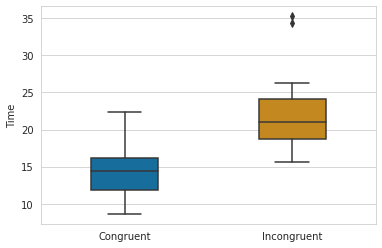

In [28]:
#Visualization 1
sns.set_style("whitegrid")
sns.boxplot(data=df[['Congruent', 'Incongruent']], orient="v",width=0.4, palette="colorblind");
plt.ylabel("Time");

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

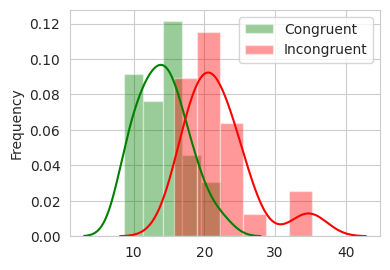

In [26]:
# Visualization 2
fig, ax = plt.subplots(1, 1, figsize = (4, 3), dpi=100)
sns.distplot(df['Congruent'], color = 'g', label="Congruent")
sns.distplot(df['Incongruent'], color = 'r', label="Incongruent")
plt.legend()
plt.ylabel("Frequency")
ax.set_xlabel('')

The two groups form normal distribution curve, with some symmetry. However, the center of incongruent group is displaced to the right. This difference is the delay produced by the extra effort.

**5.** Statistical test

The test selected is the two tailed **"t-test"**:

- The purpose is to find the critical value of ***t*** at 95% confidance level.
- Sample Size (n) = 24
- Degree of freedom (DegFree) = n - 1 = 23

In [31]:
#t-critical value - 95% confidance
from scipy.stats import t as pt
print(pt.ppf(0.95,23))

1.7138715277470473


In [33]:
#Difference
df['difference'] = df['Congruent'] - df['Incongruent']
df.head()

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [36]:
#sd and mean of the differenced dataset
s_std = df['difference'].std()
print("Std Dev of the diffenence", s_std)
s_mean = con_mean - inc_mean
print("Difference Mean", s_mean)

Std Dev of the diffenence 4.864826910359056
Difference Mean -7.964791666666665


In [37]:
# t-value
t_value = s_mean/(s_std/math.sqrt(24))
print("t-value ",t_value)

t-value  -8.020706944109955


t-statistic is -8.0207 for the difference, which is significantly lower than the t-critical value. 
The null hypothesis is rejected.
Considering α = 0.05, the time spent on naminge colours between congruent and incongruent words is considerably different. The result confirms what the experience expected..

**6.** There are various theories about the reason behind. In my case, I would support the Speed of processing theory, that states that we can process written words faster than we can process colors. Thus, it is difficult to identify the color once we’ve already read the word.


https://lesley.edu/article/what-the-stroop-effect-reveals-about-our-minds#:~:text=Stroop%20found%20that%20subjects%20took,printed%20word%20in%20experiment%20one.
